# All Models

In [98]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [99]:
from scripts.proj1_helpers import *
DATA_TRAIN_PATH = './data/train.csv' # TODO: download train data and supply path here 
y, tX2, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

In [113]:
from scripts.implementations import *
from scripts.clean_data import *
from scripts.plots import *
from scripts.cross_validation import *

**Clean the data**

In [101]:
tx = clean_data(tX2)

In [85]:
# Gradient Decent
w_GD, loss_GD = run_GD(y, tx, max_iters = 500, gamma=0.000001)
loss_GD

0.45649710593519105

In [81]:
# Stochastic Gradient Decent
w_SGD, loss_SGD = run_SGD(y, tx, max_iters = 70, gamma=0.000001)
loss_SGD

0.49737107281180465

In [84]:
# Least Squares
w_LS, loss_LS = least_squares(y, tx)
np.sqrt(2*loss_LS)

0.3446770721723313

**Cross Validation to find best degree of model**

In [120]:
max_degree = 11
losses = cross_validation_least_squares(y, tx, max_degree)

Currently at degree: 0
Currently at degree: 1
Currently at degree: 2
Currently at degree: 3
Currently at degree: 4
Currently at degree: 5
Currently at degree: 6
Currently at degree: 7
Currently at degree: 8
Currently at degree: 9
Currently at degree: 10
Currently at degree: 11


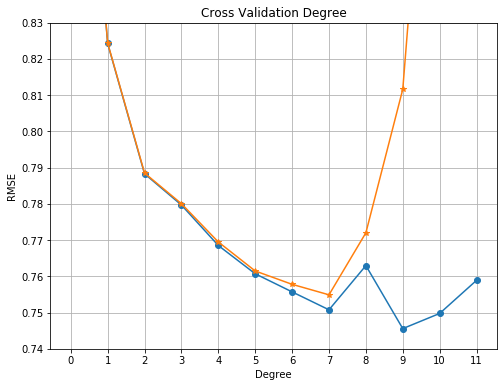

<Figure size 432x288 with 0 Axes>

In [121]:
plot_cross_validation_degree(losses)

**Cross Validation to find best lambda in Ridge Regression**

In [118]:
degree = 9
losses = cross_validation_ridge(y, tx, degree)

1e-08
0.0001
1.0
10000.0
100000000.0


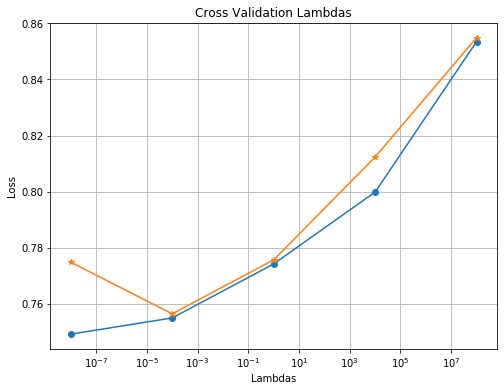

In [119]:
plot_cross_validation_lambda(losses)

In [114]:
max_degree = 12
losses = cross_validation_ridge_degree(y, tx, max_degree)

Currently at degree: 0
Currently at degree: 1
Currently at degree: 2
Currently at degree: 3
Currently at degree: 4
Currently at degree: 5
Currently at degree: 6
Currently at degree: 7
Currently at degree: 8
Currently at degree: 9
Currently at degree: 10
Currently at degree: 11
Currently at degree: 12


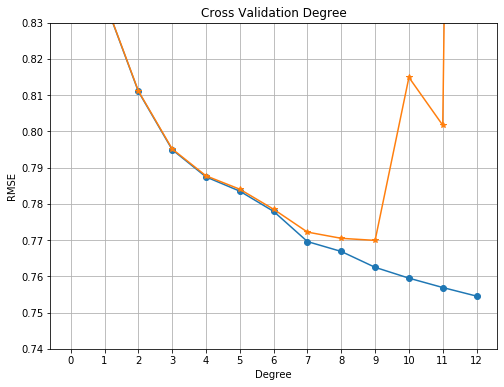

<Figure size 432x288 with 0 Axes>

In [115]:
plot_cross_validation_degree(losses)